## Unsupervised Nearest Neighbors

[[0 1]
 [1 0]
 [2 1]
 [3 4]
 [4 3]
 [5 4]]
[[0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]]


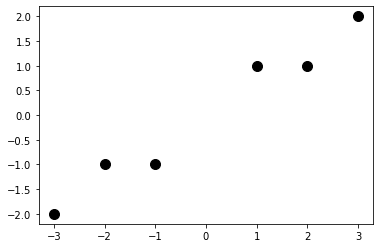

In [1]:
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X) 
# algorithm = "https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms"
distances, indices = nbrs.kneighbors(X)
print(indices)
print(distances)
plt.scatter(X[:, 0], X[:, 1], c='black', s=100);

## KMeans Clustering

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

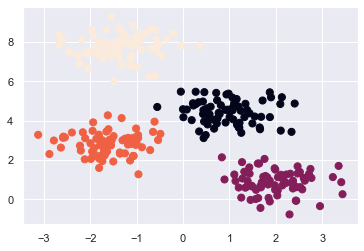

In [42]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50, c=y_true);

In [74]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, copy_x=True)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

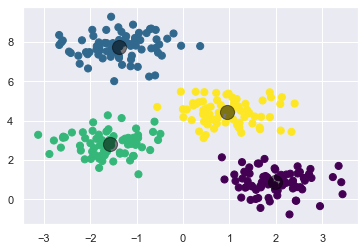

In [75]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [90]:
corrected_k_means_pred = np.zeros(y_kmeans.shape).astype(np.int8)
for i in range(4):
    data, counts = np.unique(y_true[y_kmeans == i], return_counts=True)
    corrected_k_means_pred[y_kmeans == i] = data[counts.argmax()]

In [92]:
np.sum(corrected_k_means_pred == y_true) / len(y_true)

1.0

## Gaussian Mixture Clustering

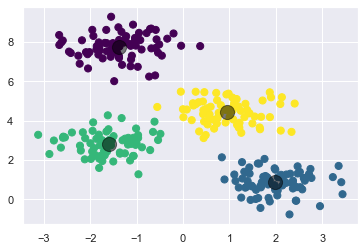

In [37]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=4)
gm.fit(X)
prediction = gm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=prediction, s=50, cmap='viridis')
plt.scatter(gm.means_[:, 0], gm.means_[:, 1], c='black', s=200, alpha=0.5);

In [93]:
corrected_guassian_pred = np.zeros(prediction.shape).astype(np.int8)
for i in range(4):
    data, counts = np.unique(y_true[prediction == i], return_counts=True)
    corrected_guassian_pred[prediction == i] = data[counts.argmax()]

In [94]:
np.sum(corrected_guassian_pred == y_true) / len(y_true)

1.0

Devide into list of clusters.

In [104]:
gm_clusters = []
y_clusters = []
for v in np.unique(y_true):
    inds = (y_true == v)
    gm_clusters.append(corrected_guassian_pred[inds])
    y_clusters.append(y_true[inds])
    
gm_clusters, y_clusters = np.array(gm_clusters), np.array(y_clusters)

## Implement Clustering Metrics Functions

<img src="prec_recall_clustering.png" width=500/>

C(x): The ID of the cluster that x belongs to
    
A(x): label of x

In [129]:
from sklearn.metrics import pairwise_distances #Hint: pd =

def correctness(y_test, y_pred, i, j):
    assert()
    if y_test[i] == y_test[j] and y_pred[i] == y_pred[j]:
        return 1
    else:
        return 0
    
def precision_bcubed(y_true, y_pred):
    assert(len(y_true) == len(y_pred)), 'length of test and prediction must be the same'
    n = len(y_test)
    # precision = "TODO"
    prec_sum = 0
    unique_values = np.unique(y_test)
    for y_t, y_p in zip(y_true, y_pred):
        prec_sum += np.sum(y_p == y_t[0]) / len(y_p)
        
    return prec_sum / n

def recall_bcubed(y_true, y_pred):
    assert(len(y_true) == len(y_pred)), 'length of test and prediction must be the same'
    n = len(y_true)
#     recall = "TODO"
    recall_sum = 0
    unique_values = np.unique(y_test)
    for y_t, y_p in zip(y_true, y_pred):
        recall_sum += np.sum(y_p == y_t[0]) / len(y_t)
        
    return recall_sum / n

def f1_bcubed(y_true, y_pred):
    assert(len(y_true) == len(y_pred)), 'length of test and prediction must be the same'
    prec = precision_bcubed(y_true, y_pred)
    rec = recall_bcubed(y_true, y_pred)
    f1 = (2 * prec * rec) / (prec + rec)
    return f1

def silhouette(X, label):
    X = np.array(X)
    assert(len(X) == len(label)), 'data and label must have same length'
    pd = "TODO"
    n = len(label)
#     score = "TODO"
#     return score / n

In [130]:
import numpy as np
y_test, y_pred = np.array([0, 0, 0, 1, 1, 1]), np.array([0, 0, 1, 1, 2, 2])

precision = precision_bcubed(y_clusters, gm_clusters)
print('precision:', precision)

recall = recall_bcubed(y_clusters, gm_clusters)
print('recall:', recall)

f1 = f1_bcubed(y_clusters, gm_clusters)
print('f1:', f1)

precision: 0.6666666666666666
recall: 1.0
f1: 0.8


## Experimenting

In [9]:
from sklearn.datasets import make_blobs, make_moons, make_circles
# from sklearn.preprocessing import StandardScaler

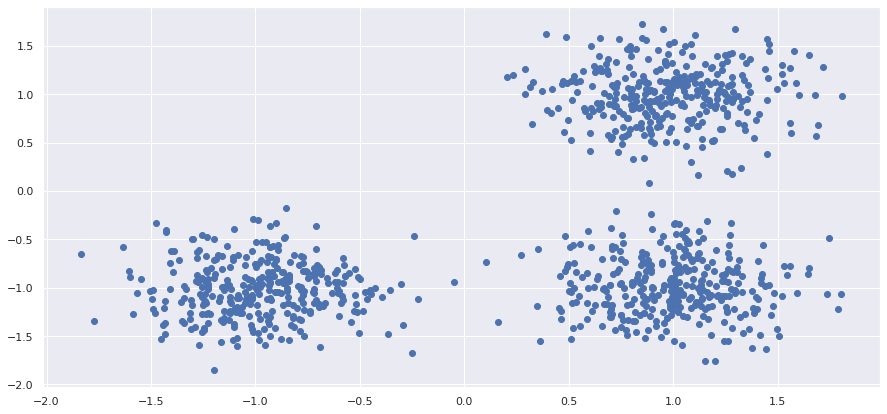

In [10]:
from matplotlib import pyplot as plt

centers = [[1, 1], [-1, -1], [1, -1]]
X_blobs, y_blobs = make_blobs(n_samples=1000, centers=centers, cluster_std=0.3,
                            random_state=0)
plt.figure(figsize=(15,7))
plt.scatter(X_blobs[:,0], X_blobs[:,1])
plt.show();

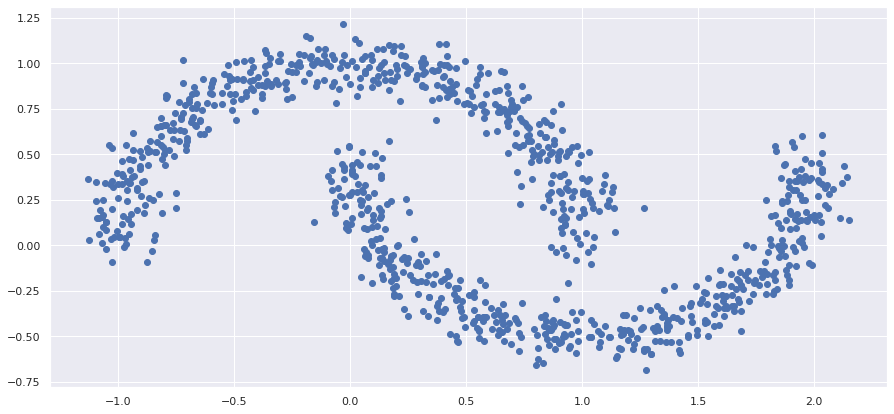

In [11]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=0)
plt.figure(figsize=(15,7))
plt.scatter(X_moons[:,0], X_moons[:,1])
plt.show();

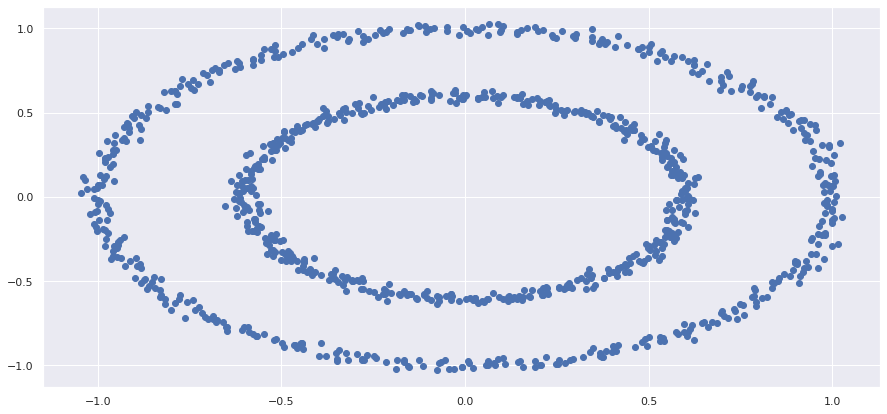

In [12]:
X_circles, y_circles = make_circles(n_samples=1000, noise=0.02, factor=0.6, random_state=0)
plt.figure(figsize=(15,7))
plt.scatter(X_circles[:,0], X_circles[:,1])
plt.show()

In [13]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

### 1.Apply all this algorithms to 3 datasets above, plot the results
### 2. Apply your implemented metrics on your predictions
### 3.Check if the better result by plot brings the better score
###### X_blobs, y_blobs
###### X_moons, y_moons 
###### X_circles, y_circles

In [14]:
# TODO



### Try to change params during dataset creation to see the results (e.g., increase noise)
##### Can Do Cross Validation?

In [15]:
# TODO



### Summary of thoughts?

In [16]:
# TO_WRITE